In [1]:
import os
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
UEA_MTSC30 = ['EthanolConcentration',
              'FaceDetection',
              'Handwriting',
              'Heartbeat',
              'JapaneseVowels',
              'PEMS-SF',
              'SelfRegulationSCP1',
              'SelfRegulationSCP2',
              'SpokenArabicDigits',
              'UWaveGestureLibrary',
              'ArticularyWordRecognition',
              'AtrialFibrillation',
              'BasicMotions',
              'CharacterTrajectories',
              'Cricket',
              'DuckDuckGeese',
              'EigenWorms',
              'Epilepsy',
              'ERing',
              'FingerMovements',
              'HandMovementDirection',
              'InsectWingbeat',
              'Libras',
              'LSST',
              'MotorImagery',
              'NATOPS',
              'PenDigits',
              'PhonemeSpectra',
              'RacketSports',
              'StandWalkJump']

===================DLinear_CLS===================


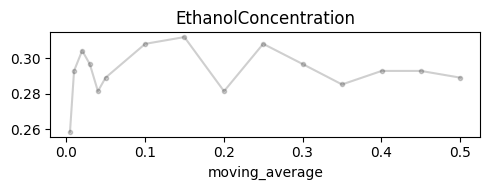

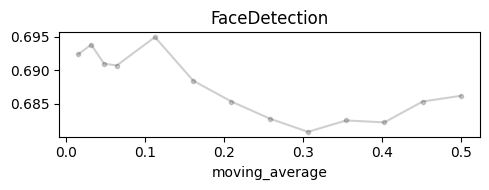

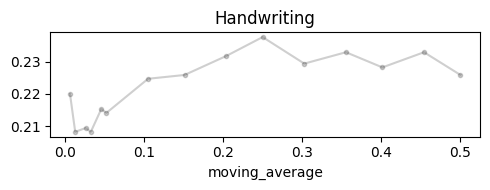

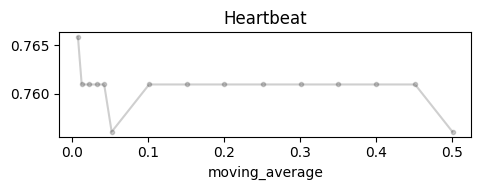

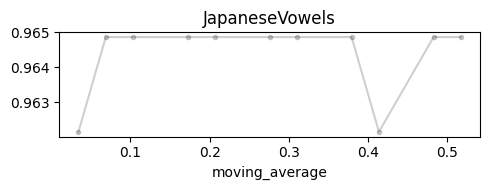

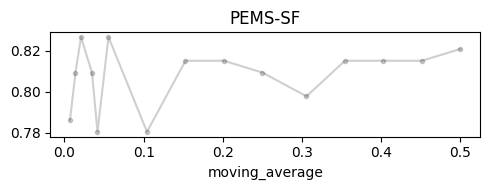

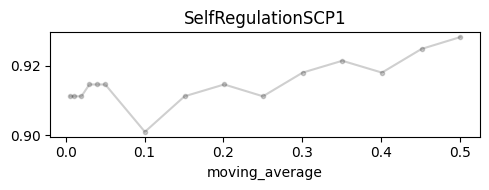

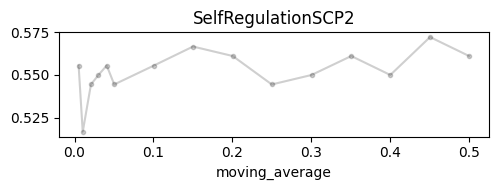

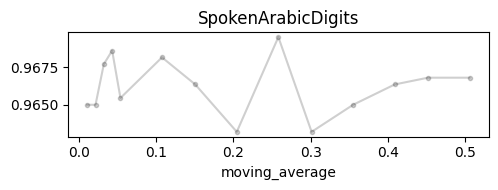

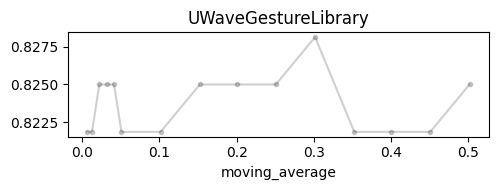

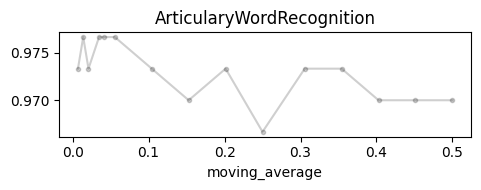

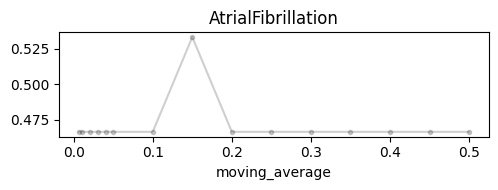

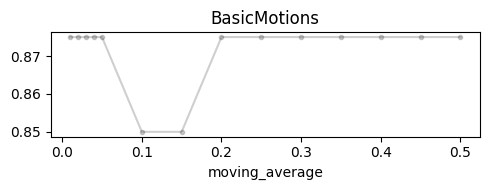

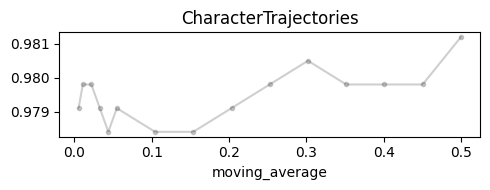

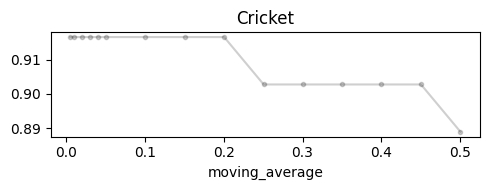

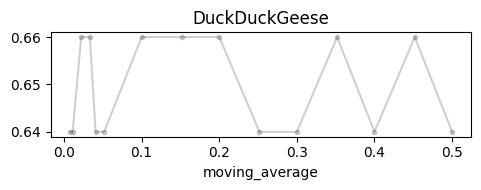

no file


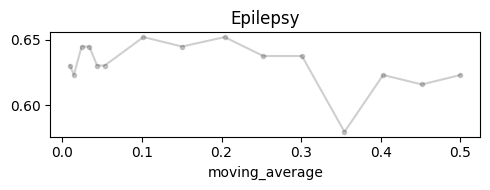

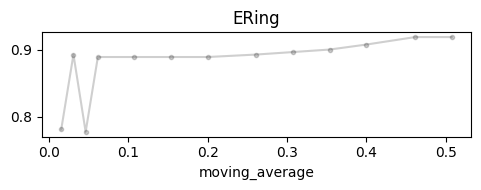

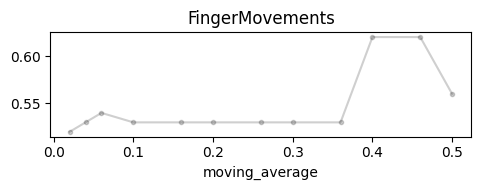

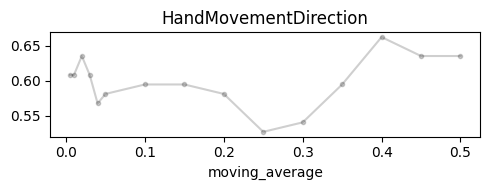

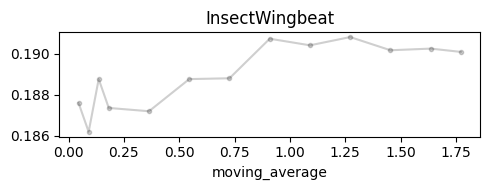

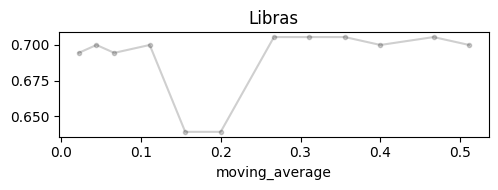

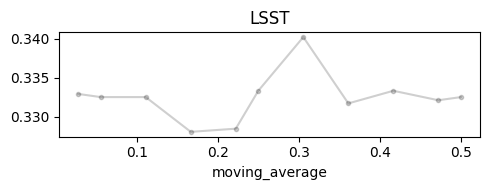

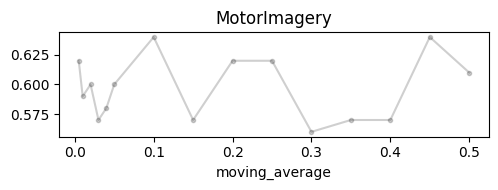

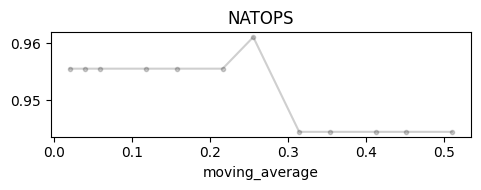

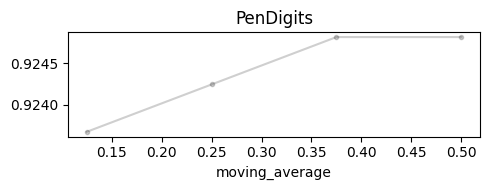

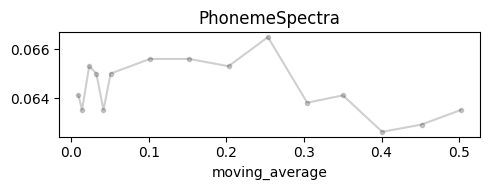

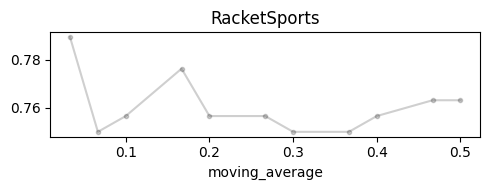

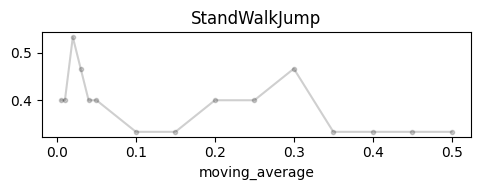

In [42]:
model = 'DLinear_CLS'
print(f'==================={model}===================')
for data_name in UEA_MTSC30:
    # print(data_name)

    if os.path.exists(f'done/results/{model}_{data_name}.out'):
        with open(f'done/results/{model}_{data_name}.out', 'r') as file:
            data = file.read().splitlines()
    # elif os.path.exists(f'results/{model}_{data_name}.out'):
    #     with open(f'results/{model}_{data_name}.out', 'r') as file:
    #         data = file.read().splitlines()
    else:
        print('no file')
        continue


    result_lst = list()
    for i in range(len(data)):
        if data[i].startswith('>>>>>>>testing : '):
            data_meta = list(data[i][16:-33].split('_'))
            data_meta[6] = int(data_meta[6].replace('sl', ''))
            data_meta[7] = int(data_meta[7].replace('ll', ''))
            data_meta[8] = int(data_meta[8].replace('pl', ''))
            data_meta[9] = int(data_meta[9].replace('ma', '')) / data_meta[6]
            acc = data[i+3].replace('accuracy:', '')
            model_params = data[i+4].replace('model parameter : ', '')
            model_size = data[i+5].replace('model size : ', '').replace('MB', '')

            result_data = {
                # 'task': data_meta[0],
                # 'model_id': data_meta[1],
                'data_name': data_meta[2],
                'model': data_meta[3],
                # 'data': data_meta[4],
                # 'feature': data_meta[5],
                'seq_len': data_meta[6],
                # 'label_len': data_meta[7],
                # 'pred_len': data_meta[8],
                'moving_average': data_meta[9],
                # 'exp': data_meta[11],
                # 'desc': data_meta[12],
                'acc': float(acc),
                'model_params': int(model_params),
                'model_size (MB)': float(model_size)
            }

            result_lst.append(result_data)

    result_df = pd.DataFrame(result_lst)
    try:
        # print(result_df['acc'].max() * 100)
        # display(result_df[result_df['acc'] == result_df['acc'].max()].sort_values('model_params'))

        col = 'moving_average'

        fig = plt.figure(figsize=(5, 2))

        tmp_result = result_df.pivot_table(columns=col, values='acc')
        tmp_result = pd.DataFrame(tmp_result.values, columns=tmp_result.columns)
        plt.plot(tmp_result.T, marker='.', color='#111', alpha=0.2)
        plt.xlabel(col)
        plt.grid(False)
        plt.title(data_name)
        plt.tight_layout()
        display(fig)
        plt.close(fig)




    except:
        pass
    
    